# Trabajo Práctico N°2: Finanzas - Vidman Xavier Harry

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
sns.set()
%matplotlib inline

## Obtención de los datos de cada empresa

### Comenzamos obteniendo los símbolos de cada empresa a través de la URL de wikipedia: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [2]:
df_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

### Descargamos todos los datos de cada empresa, en formato .csv, de la database de Yahoo Finance. Al mismo tiempo, a cada dataframe los almacenamos en una carpeta llamada "df_companies". Para un mayor orden, creamos un .csv para cada empresa.

In [ ]:
symbol_list = list(df_wiki['Symbol'])

for i,symbol in enumerate(symbol_list):
    if symbol.__contains__('.'):
        symbol_list[i] = symbol.replace('.', '-')

for symbol in symbol_list:
    globals()[str(symbol).lower()] = yf.download(f"{symbol}", start='2000-01-01', end='2021-12-31')
    globals()[str(symbol).lower()].to_csv(f'../PI_semana_2/df_companies/{symbol}.csv', index=True, sep=';')


# Si quisiera almacenar cada df en su varible-simbolo correspondiente:
#for symbol in symbol_list:
#    globals()[str(symbol).lower()] = pd.read_csv(f'../PI_semana_2/df_companies/{symbol}.csv', delimiter=';')

### Una vez que tenemos los dataframes de cada empresa, los juntamos a todos en un mismo dataframe llamado "sp500". Además, este dataframe será exportado en formato .csv para trabajarlo con más facilidad en un futuro.

In [3]:
#concateno todos los .csv de la carpeta df_companies en un solo dataframe llamado data
from os import listdir
path = r'C:\Users\Xavi\Desktop\Labs\PI_semana_2\df_companies'
files = listdir(path)
data = pd.concat((pd.read_csv(f'df_companies/{file}', delimiter=';').assign(filename = file) for file in files), ignore_index=True)

for i in data.index.values:
    data['filename'][i] = data['filename'][i].replace('.csv', '')

data.rename(columns = {'filename':'Symbol'}, inplace = True)

#Creo el DF definitivo "sp500" con todo lo que había en data + la industria a la que pertenece + day of the week + month
industry = df_wiki.drop(columns={'Security', 'SEC filings', 'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK', 'Founded'})
sp500 = pd.merge(data, industry, on='Symbol', how='inner')

sp500['Date'] = pd.to_datetime(sp500['Date'])

sp500['Day_of_week'] = sp500["Date"].dt.day_name()
sp500['Month'] = sp500["Date"].dt.month_name()
sp500['Year'] = pd.DatetimeIndex(sp500['Date']).year

sp500.rename(columns = {'GICS Sector':'Industry'}, inplace = True)
sp500.to_csv('../PI_semana_2/sp500.csv', index=False, sep=';')


In [2]:
sp500 = pd.read_csv('../sp500.csv', delimiter=';')

In [3]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Industry,Day_of_week,Month,Year
0,2000-01-03,56.330471,56.464592,48.193848,51.502148,44.221340,4674353.0,A,Health Care,Monday,January,2000
1,2000-01-04,48.730328,49.266811,46.316166,47.567955,40.843327,4765083.0,A,Health Care,Tuesday,January,2000
2,2000-01-05,47.389126,47.567955,43.141991,44.617310,38.309795,5758642.0,A,Health Care,Wednesday,January,2000
3,2000-01-06,44.080830,44.349072,41.577251,42.918453,36.851112,2534434.0,A,Health Care,Thursday,January,2000
4,2000-01-07,42.247852,47.165592,42.203148,46.494991,39.922039,2819626.0,A,Health Care,Friday,January,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
2467087,2021-12-23,241.699997,244.389999,240.690002,242.509995,241.697968,1172400.0,ZTS,Health Care,Thursday,December,2021
2467088,2021-12-27,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,Monday,December,2021
2467089,2021-12-28,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,Tuesday,December,2021
2467090,2021-12-29,244.020004,247.850006,243.639999,247.029999,246.202835,939900.0,ZTS,Health Care,Wednesday,December,2021


## Calculamos los índices financieros y los agregamos como columnas al dataframe

In [4]:
sp500['Gap_return'] = np.log(sp500['Close']/sp500['Close'].shift(1))

sp500['Intra_return'] = np.log(sp500['Close']/sp500['Open'])

sp500['Variation'] = sp500.groupby('Symbol')['Adj Close'].pct_change()

sp500['Volatility'] = sp500['Variation'].rolling(252).std()**.5

In [5]:
sp500.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Industry,Day_of_week,Month,Year,Gap_return,Intra_return,Variation,Volatility
0,2000-01-03,56.330471,56.464592,48.193848,51.502148,44.221340,4674353.0,A,Health Care,Monday,January,2000,NaN,-0.089612,NaN,NaN
1,2000-01-04,48.730328,49.266811,46.316166,47.567955,40.843327,4765083.0,A,Health Care,Tuesday,January,2000,-0.079464,-0.024142,-0.076389,NaN
2,2000-01-05,47.389126,47.567955,43.141991,44.617310,38.309795,5758642.0,A,Health Care,Wednesday,January,2000,-0.064037,-0.060271,-0.062030,NaN
3,2000-01-06,44.080830,44.349072,41.577251,42.918453,36.851112,2534434.0,A,Health Care,Thursday,January,2000,-0.038820,-0.026723,-0.038076,NaN
4,2000-01-07,42.247852,47.165592,42.203148,46.494991,39.922039,2819626.0,A,Health Care,Friday,January,2000,0.080043,0.095791,0.083333,NaN
5,2000-01-10,49.356224,49.803291,48.327969,49.311516,42.340385,2148446.0,A,Health Care,Monday,January,2000,0.058813,-0.000906,0.060577,NaN
6,2000-01-11,49.311516,49.311516,47.523247,48.640915,41.764595,1855985.0,A,Health Care,Tuesday,January,2000,-0.013693,-0.013693,-0.013599,NaN
7,2000-01-12,48.640915,48.640915,45.824390,47.657368,40.920101,1429874.0,A,Health Care,Wednesday,January,2000,-0.020428,-0.020428,-0.020220,NaN
8,2000-01-13,48.909157,49.937412,47.210300,48.372677,41.534286,1134337.0,A,Health Care,Thursday,January,2000,0.014898,-0.011030,0.015009,NaN
9,2000-01-14,47.925610,49.624462,47.925610,48.909157,41.994923,1316916.0,A,Health Care,Friday,January,2000,0.011030,0.020315,0.011091,NaN


## ¿Cuál es el mejor día para invertir teniendo en cuenta el retorno de los movimientos gap?

In [6]:
day_week_mean = sp500.groupby('Day_of_week').mean()
day_week_sum = sp500.groupby('Day_of_week').sum()

day_week_mean['Day_of_week'] = day_week_mean.index.values
day_week_sum['Day_of_week'] = day_week_sum.index.values

[Text(0.5, 1.0, 'Volumen promedio de cada día')]

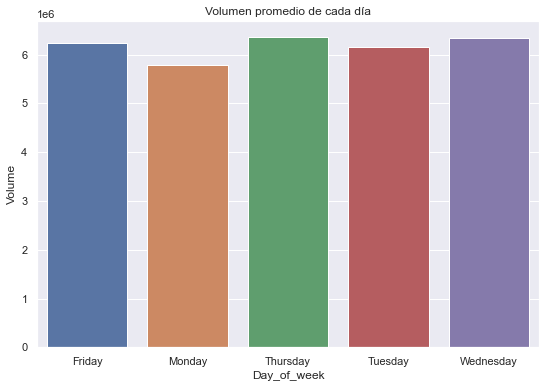

In [7]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.barplot(x='Day_of_week', y='Volume', data=day_week_mean).set(title='Volumen promedio de cada día')


[Text(0.5, 1.0, 'Volumen total de cada día')]

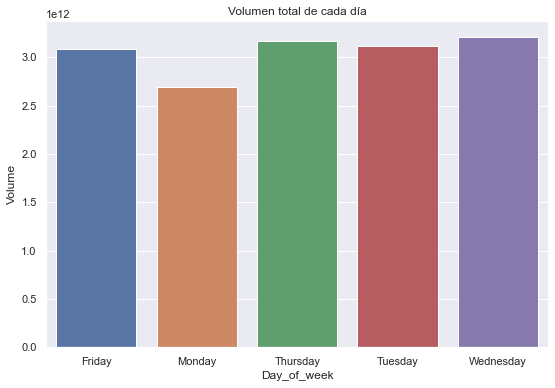

In [8]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.barplot(x='Day_of_week', y='Volume', data=day_week_sum).set(title='Volumen total de cada día')

### Graficamos la media del "Retorno de gap" para cada día de la semana. Vemos que el mejor día es el MARTES

[Text(0.5, 1.0, 'Promedio de Retorno de movimientos gap')]

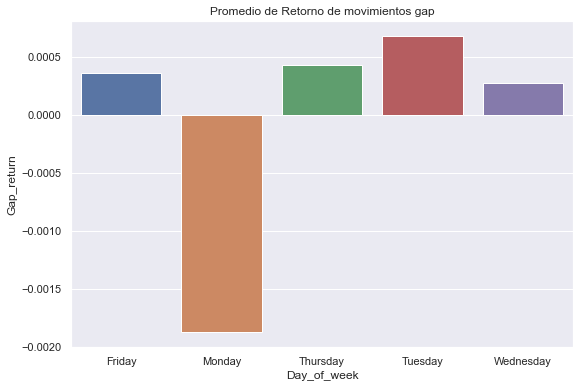

In [9]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.barplot(x='Day_of_week', y='Gap_return', data=day_week_mean).set(title='Promedio de Retorno de movimientos gap')
#sns.barplot(x='Day_of_week', y='Gap_return', data=day_week_sum)

## ¿Cuál es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios?

### Graficamos la media del "Retorno intradiario" para cada día de la semana. Vemos que el mejor día es el JUEVES

[Text(0.5, 1.0, 'Promedio de Retorno de movimientos intradiarios')]

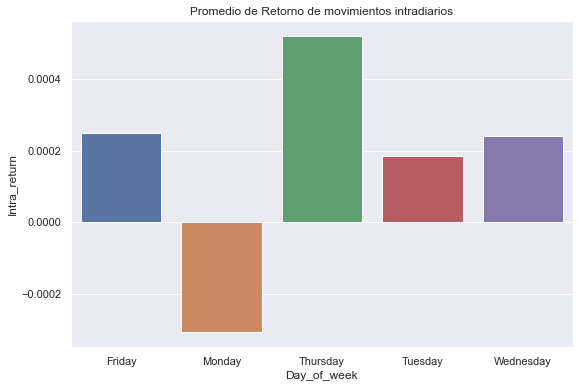

In [10]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.barplot(x='Day_of_week', y='Intra_return', data=day_week_mean).set(title='Promedio de Retorno de movimientos intradiarios')

## ¿Cuáles son las mejores industrias que pertenecen al S&P500 en las cuales se puede invertir?

In [11]:
industry_mean = sp500.groupby('Industry').mean()

industry_mean['Industry'] = industry_mean.index.values

industry_mean

,Open,High,Low,Close,Adj Close,Volume,Year,Gap_return,Intra_return,Variation,Volatility,Industry
Industry,,,,,,,,,,,,
Communication Services,97.513001,98.576087,96.423521,97.529356,93.402465,9.183034e+06,2011.982178,-0.000039,0.000015,0.000688,0.144081,Communication Services
Consumer Discretionary,105.894890,107.215582,104.562657,105.922441,100.904042,7.787991e+06,2011.197743,0.000039,0.000106,0.000881,0.147252,Consumer Discretionary
Consumer Staples,52.672852,53.146055,52.205976,52.690231,42.043998,4.398915e+06,2010.843479,-0.000047,0.000372,0.000543,0.119954,Consumer Staples
Energy,48.540324,49.179815,47.860823,48.527494,37.599065,7.014568e+06,2011.081381,-0.000203,-0.000299,0.000678,0.148598,Energy
Financials,73.243841,74.062856,72.392159,73.244731,59.971651,5.491937e+06,2010.996401,-0.000011,0.000135,0.000679,0.137677,Financials
Health Care,77.040704,77.949665,76.116841,77.060959,72.768629,3.729630e+06,2010.880754,0.000103,0.000323,0.000822,0.139627,Health Care
Industrials,68.543858,69.280209,67.788612,68.552951,59.989930,2.942168e+06,2011.096509,0.000018,0.000253,0.000744,0.137157,Industrials
Information Technology,56.841774,57.582477,56.079838,56.852232,52.654725,1.581473e+07,2011.413009,0.000085,0.000222,0.000888,0.151621,Information Technology
Materials,57.685262,58.344642,57.003514,57.686395,49.505597,2.964988e+06,2011.093151,-0.000059,0.000050,0.000688,0.139493,Materials


[Text(0.5, 1.0, 'Retorno intradiario de cada industria')]

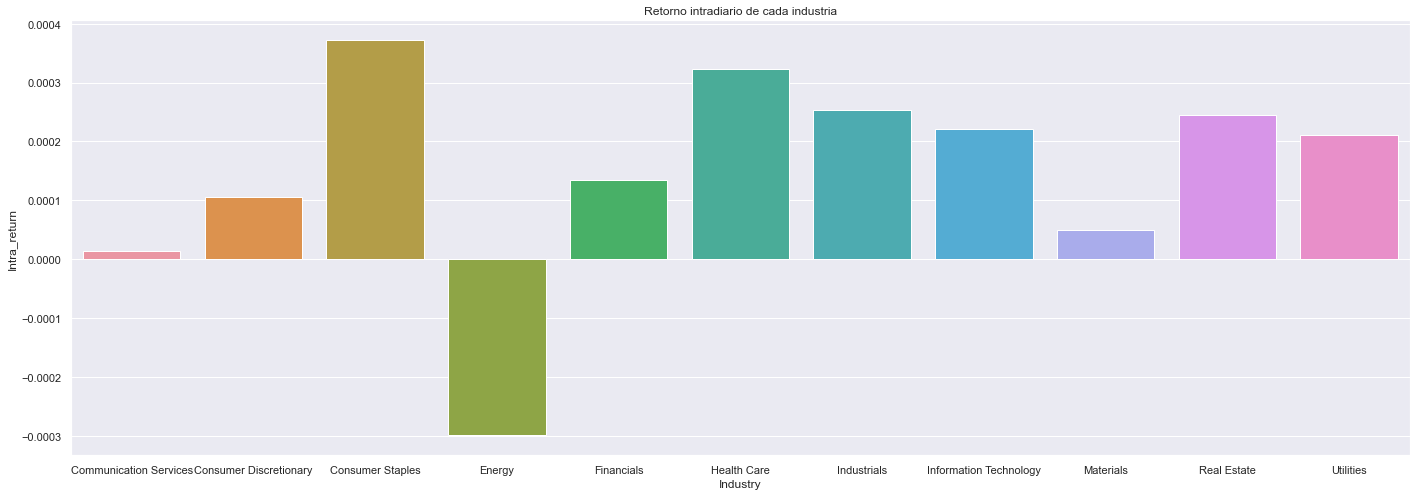

In [12]:
sns.set(rc = {'figure.figsize':(24,8)})
sns.barplot(x='Industry', y='Intra_return', data=industry_mean).set(title='Retorno intradiario de cada industria')

[Text(0.5, 1.0, 'Retorno de gap de cada industria')]

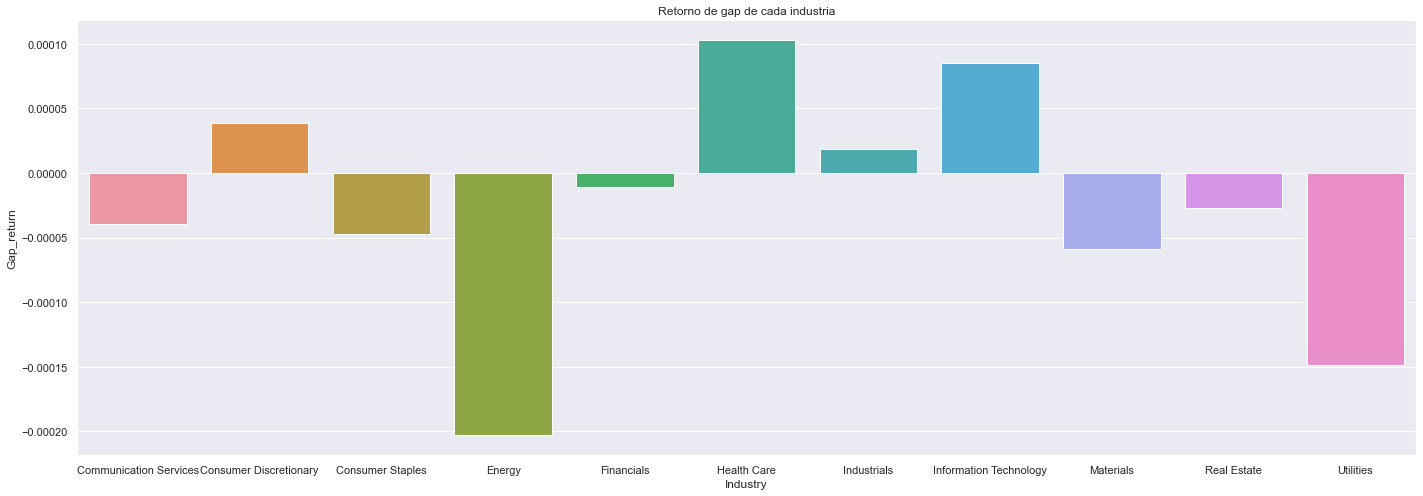

In [13]:
sns.set(rc = {'figure.figsize':(24,8)})
sns.barplot(x='Industry', y='Gap_return', data=industry_mean).set(title='Retorno de gap de cada industria')

### Concluimos que las mejores industrias son las que tienen "Retorno intradiario" y "Retorno Gap", de media, POSITIVOS. Es decir: Consumer Discretionary, Health Care Industry, Industrials, Information Technology

### Las variaciones y volatilidad no fueron tenidas en cuenta ya que son muy parecidas entre industrias.

## ¿Cuáles son las 9 mejores empresas para invertir?

In [14]:
df_symb_per_year = sp500.groupby(['Symbol', 'Year']).sum()
df_symb_per_year.reset_index(inplace=True)

df_symb_per_year


,Symbol,Year,Open,High,Low,Close,Adj Close,Volume,Gap_return,Intra_return,Variation,Volatility
0,A,2000,12591.469944,13060.152901,12100.433628,12569.038355,10792.166426,1.068041e+09,-0.273889,-0.728351,0.249632,0.000000
1,A,2001,5911.788282,6093.562244,5747.312222,5930.262884,5091.907763,8.211647e+08,-0.652522,1.078626,-0.423866,57.455204
2,A,2002,4141.237480,4237.195986,4044.721015,4136.430615,3551.667748,9.324905e+08,-0.462108,-0.226736,-0.275533,48.007943
3,A,2003,3640.736775,3700.951362,3584.370533,3648.648065,3132.842484,8.176573e+08,0.487391,0.476368,0.596086,48.989867
4,A,2004,4848.812591,4924.105864,4775.915605,4845.271831,4160.300763,1.075427e+09,-0.193326,-0.172132,-0.119491,38.354044
...,...,...,...,...,...,...,...,...,...,...,...,...
9874,ZTS,2017,15327.339977,15438.630039,15235.759972,15343.639977,14900.195946,6.768945e+08,0.296979,0.277849,0.315189,26.779351
9875,ZTS,2018,21474.919945,21677.169998,21266.740005,21471.039986,20975.386459,6.282999e+08,0.171763,-0.033253,0.205038,27.392997
9876,ZTS,2019,27800.600014,28042.329964,27570.039955,27814.030014,27352.691071,5.315672e+08,0.436466,0.158172,0.464466,30.149462
9877,ZTS,2020,36619.229927,37095.320076,36168.170013,36630.909958,36231.520874,5.121247e+08,0.223521,0.119155,0.306060,37.055070


### Calculamos la diferencia entre los Retornos del 2021 y 2020

In [15]:
df_2020 = df_symb_per_year.loc[df_symb_per_year['Year']==2020]
df_2020.reset_index(inplace=True)
df_2020.drop(columns={'index'}, inplace=True)

df_2021 = df_symb_per_year.loc[df_symb_per_year['Year']==2021]
df_2021.reset_index(inplace=True)
df_2021.drop(columns={'index'}, inplace=True)

if len(df_2020['Symbol'])>len(df_2021['Symbol']):
    max = len(df_2021['Symbol'])
else:
    max = len(df_2020['Symbol'])

df_2021['pendiente_gap'] = df_2021['Gap_return'] - df_2020['Gap_return']
df_2021['pendiente_intra'] = df_2021['Intra_return'] - df_2020['Intra_return']

df_2021.drop(columns={'Year', 'Open','High', 'Low', 'Close', 'Adj Close', 'Volume', 'Gap_return', 'Intra_return', 'Variation', 'Volatility'})


C:\Users\Xavi\AppData\Local\Temp\ipykernel_13076\2634373415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.drop(columns={'index'}, inplace=True)
C:\Users\Xavi\AppData\Local\Temp\ipykernel_13076\2634373415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.drop(columns={'index'}, inplace=True)
C:\Users\Xavi\AppData\Local\Temp\ipykernel_13076\2634373415.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Symbol,pendiente_gap,pendiente_intra
0,A,-0.022707,-0.201598
1,AAL,0.734234,1.373182
2,AAP,0.427447,0.411211
3,AAPL,-0.297030,-0.135930
4,ABBV,0.047135,0.299134
...,...,...,...
495,YUM,0.213736,0.234880
496,ZBH,-0.591913,-0.377210
497,ZBRA,0.619643,0.234720
498,ZION,0.150294,0.028998


### Filtro las mejores empresas con pendiente_gap y pendiente_intra

In [19]:
top_10_gap = []
for value in df_2021.sort_values('pendiente_gap', ascending=False)['Symbol']:
    if len(top_10_gap) >= 10:
        break
    top_10_gap.append(value)

top_10_intra = []
for value in df_2021.sort_values('pendiente_intra', ascending=False)['Symbol']:
    if len(top_10_intra) >= 10:
        break
    top_10_intra.append(value)

top_companies = []
for c in top_10_gap:
    top_companies.append(c)

for c in top_10_intra:
    top_companies.append(c)

top_companies = list(dict.fromkeys(top_companies))

top10_companies = pd.DataFrame(columns={'Symbol', 'Volume'})
top10_companies['Symbol'] = top_companies

top10_companies


,Volume,Symbol
0,NaN,ORLY
1,NaN,MRO
2,NaN,DVN
3,NaN,FANG
4,NaN,APA
5,NaN,OTIS
6,NaN,EOG
7,NaN,COP
8,NaN,PSA
9,NaN,TYL


### Filtro las 10 empresas con mayor volumen

In [20]:
company_sum = sp500.groupby('Symbol').sum()

for i in range(0, len(top10_companies)):
    for symbol in company_sum.index.values:
        if top10_companies['Symbol'][i] == symbol:
            top10_companies['Volume'][i] = company_sum['Volume'][symbol]

top10_companies = top10_companies.sort_values('Volume', ascending=False)
top10_companies.reset_index(inplace=True)
top10_companies.drop(columns={'index'}, inplace=True)

for i in top10_companies.index.values:
    if i>=10:
        top10_companies.drop(axis=0, index=i, inplace=True)

top10_companies

,Volume,Symbol
0,62104792566.0,MRO
1,53733895500.0,AAL
2,51590661264.0,COP
3,39683568200.0,CCL
4,27029784500.0,DVN
5,26786606800.0,EOG
6,24150621787.0,APA
7,22019584359.0,SO
8,15875105200.0,NCLH
9,8436496500.0,MRNA
